In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [2]:
filepath = "../Data Preprocessing/iot23_combined.csv"
df = pd.read_csv(filepath, nrows=400000)
del df['Unnamed: 0']
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
399996,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
399997,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
399998,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0


In [3]:
df['label'].value_counts()

PartOfAHorizontalPortScan    265875
Benign                        56943
Okiru                         48352
DDoS                          24959
Attack                         3814
C&C-Torii                        30
C&C-HeartBeat                    20
C&C                               7
Name: label, dtype: int64

In [4]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp',
       'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ',
       'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR',
       'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
       'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR'],
      dtype='object')

In [5]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [7]:
tuned_parameters  = {
    "fit_intercept" : [False, True],
    "C" : np.logspace(start=-9, stop=0, num=10, base=10)
}

print(tuned_parameters)

{'fit_intercept': [False, True], 'C': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])}


In [8]:
clf = GridSearchCV(LinearSVC(verbose=False), tuned_parameters, scoring="accuracy", n_jobs=8, verbose=2)
clf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\marce\Anaconda2\envs\doutorado\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(verbose=False), n_jobs=8,
             param_grid={'C': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00]),
                         'fit_intercept': [False, True]},
             scoring='accuracy', verbose=2)

In [9]:
print("Best score found on development set:", clf.best_score_)

print("\nBest parameters set found on development set:", clf.best_params_)

print("\nRefit time (in seconds):", clf.refit_time_)

print("\nGrid scores on development set:")
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]
for mean, std, param in zip(means, stds, params):
    print("%0.3f (+/-%0.06f) for %r" % (mean, std * 2, param))

Best score found on development set: 0.797490625

Best parameters set found on development set: {'C': 0.001, 'fit_intercept': True}

Refit time (in seconds): 269.7992286682129

Grid scores on development set:
0.670 (+/-0.000207) for {'C': 1e-09, 'fit_intercept': False}
0.670 (+/-0.000207) for {'C': 1e-09, 'fit_intercept': True}
0.671 (+/-0.000126) for {'C': 1e-08, 'fit_intercept': False}
0.671 (+/-0.000123) for {'C': 1e-08, 'fit_intercept': True}
0.677 (+/-0.000258) for {'C': 1e-07, 'fit_intercept': False}
0.676 (+/-0.000680) for {'C': 1e-07, 'fit_intercept': True}
0.688 (+/-0.002647) for {'C': 1e-06, 'fit_intercept': False}
0.689 (+/-0.002679) for {'C': 1e-06, 'fit_intercept': True}
0.786 (+/-0.003181) for {'C': 1e-05, 'fit_intercept': False}
0.785 (+/-0.003559) for {'C': 1e-05, 'fit_intercept': True}
0.794 (+/-0.002495) for {'C': 0.0001, 'fit_intercept': False}
0.794 (+/-0.002406) for {'C': 0.0001, 'fit_intercept': True}
0.797 (+/-0.001103) for {'C': 0.001, 'fit_intercept': False}
0.

Text(0.5, 1.0, 'GridSearchCV results')

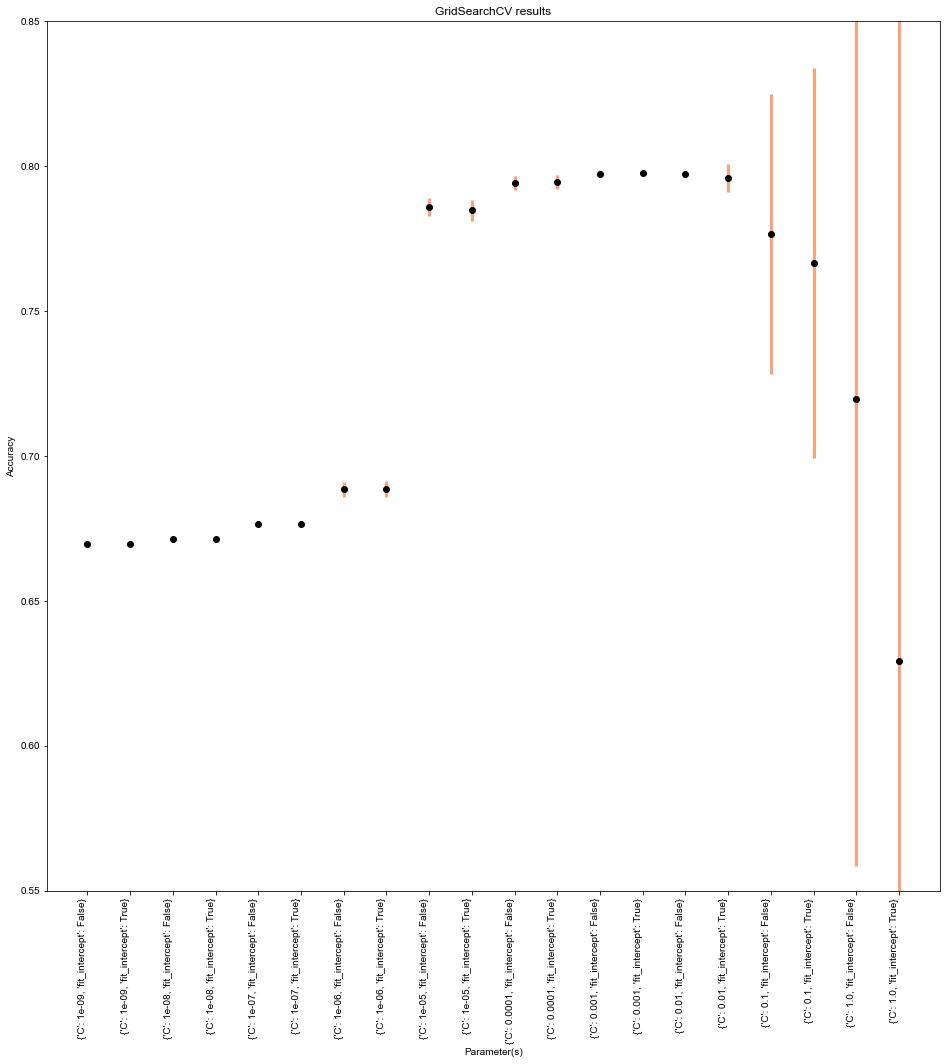

In [10]:
x = [str(x) for x in params]
y = means
err = stds * 2
step = 1

fig, ax = plt.subplots(figsize=(16,16))
plt.style.use('seaborn-whitegrid')
plt.errorbar(x[::step], y[::step], yerr=err[::step], fmt='o', color='black', ecolor='lightsalmon', elinewidth=3, capsize=0);
plt.xlabel('Parameter(s)')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Accuracy')
min_y = np.floor(10*np.min(y[::step]))/10 - 0.05
max_y = np.ceil(10*np.max(y[::step]))/10 + 0.05
plt.ylim(min_y,max_y)
plt.yticks(np.linspace(min_y, max_y, int(1+(max_y-min_y)*10*2)))
plt.title('GridSearchCV results')

In [11]:
print("Detailed classification report:")
print(" - The model is trained on the full development set.")
print(" - The scores are computed on the full evaluation set.")
Y_true, Y_pred = Y_test, clf.predict(X_test)
print(classification_report(Y_true, Y_pred))

Detailed classification report:
 - The model is trained on the full development set.
 - The scores are computed on the full evaluation set.


C:\Users\marce\Anaconda2\envs\doutorado\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marce\Anaconda2\envs\doutorado\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                           precision    recall  f1-score   support

                   Attack       0.95      0.96      0.96       743
                   Benign       0.99      0.88      0.93     11473
                      C&C       0.00      0.00      0.00         1
            C&C-HeartBeat       0.00      0.00      0.00         3
                C&C-Torii       0.00      0.00      0.00         6
                     DDoS       0.00      0.00      0.00      4938
                    Okiru       0.00      0.00      0.00      9749
PartOfAHorizontalPortScan       0.77      1.00      0.87     53087

                 accuracy                           0.80     80000
                macro avg       0.34      0.35      0.34     80000
             weighted avg       0.66      0.80      0.72     80000



C:\Users\marce\Anaconda2\envs\doutorado\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
labels = df['label'].unique().tolist()
#labels.remove('C&C-Mirai')
print(labels)

['PartOfAHorizontalPortScan', 'Benign', 'Okiru', 'DDoS', 'C&C-HeartBeat', 'C&C-Torii', 'C&C', 'Attack']


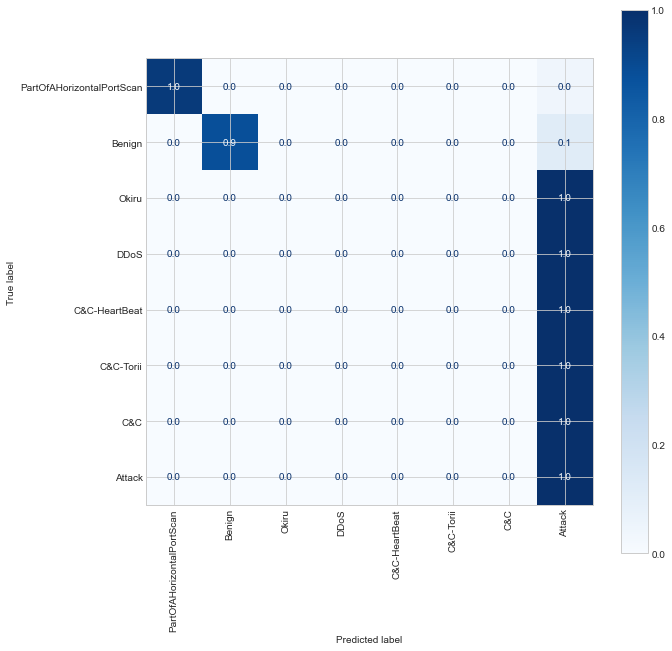

In [13]:
cm = confusion_matrix(Y_true, Y_pred, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,
          cmap=plt.cm.Blues,
          xticks_rotation=90,
          values_format='.1f')